# Exploratory - US Flights in 2008

### By Victoire Renaudin

In this project, I will analyze some data comes from RITA. I have downloaded the data for 2008 to analyze the situation of this year. 

As explained on the website of RITA, this dataset concerns airlines data with causes of delays and cancellations by flight number. 

I will try to compare flights delays and cancellations on some variables such as : 
- months
- air carriers
- delays reaons 
- cancellations reasons

In [1]:
# importation of usefull librairies

import pandas as pd 
import numpy as np 
import os 
import datetime
import json
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# importation of the csv files 

df_2008 = pd.read_csv('2008.csv')

In [4]:
# Structure of the dataset : how many rows and columns ? 
df_2008.shape

(7009728, 29)

In [5]:
# Structure of the dataset : previe of some lines

df_2008.sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1457052,2008,3,16,7,2028.0,2023,2347.0,2325,US,218,...,5.0,43.0,0,NaN,0,5.0,0.0,17.0,0.0,0.0
1598879,2008,3,13,4,553.0,600,648.0,700,MQ,4660,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
940701,2008,2,3,7,550.0,600,832.0,817,FL,188,...,8.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,0.0
174324,2008,1,4,5,1124.0,1130,1135.0,1139,OO,3715,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3287976,2008,6,26,4,610.0,610,742.0,737,US,981,...,7.0,21.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In this file, there is about 7 millions of flights. They are classified by months.

In [9]:
df_2008.groupby('Month')['FlightNum'].count()

Month
1     605765
2     569236
3     616090
4     598126
5     606293
6     608665
7     627931
8     612279
9     540908
10    556205
11    523272
12    544958
Name: FlightNum, dtype: int64

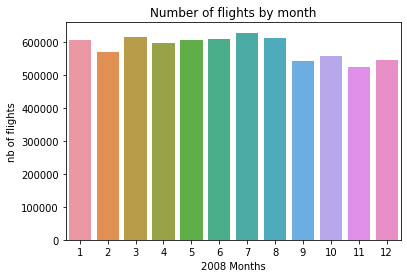

In [10]:
# Visualization of this data thank to a graph
sns.countplot(data = df_2008, 
                  x = 'Month')

plt.xlabel('2008 Months')
plt.ylabel('nb of flights')
plt.title('Number of flights by month')

plt.show()

An other parameter which could be analyzed is the carrier. 
As there are a lot of carriers in this dataset, I will create a whole. 

In [11]:
# Creation of a dataframe with one row by carrier 
df_carrier = df_2008['UniqueCarrier'].drop_duplicates().reset_index()

In [13]:
df_carrier.shape

(20, 2)

There are 20 unique carriers in this dataset. 

In [12]:
# Creation of the list of the carrier 
Carrier_list = [] 
   
for index, rows in df_carrier.iterrows(): 
    my_list = rows.UniqueCarrier
    Carrier_list.append(my_list)

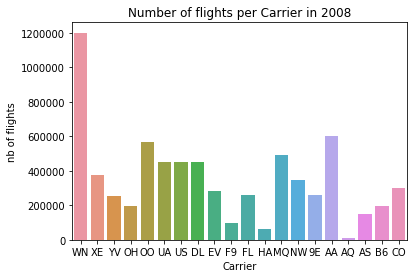

In [14]:
# Creation of a graph representing this information
sns.countplot(data = df_2008, 
                  x = 'UniqueCarrier')

plt.xlabel('Carrier')
plt.ylabel('nb of flights')
plt.title('Number of flights per Carrier in 2008')

plt.show()

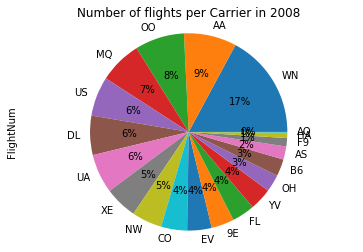

In [16]:
# Repartition of the flights by carrier thanks to a pie chart
df_2008.groupby('UniqueCarrier')['FlightNum'].count().sort_values(ascending = False).plot(kind='pie',
                                                                autopct='%1.0f%%')
plt.title('Number of flights per Carrier in 2008')
plt.axis('equal')
plt.show()

Another parameter which I could analyzed is the flights duration. 
As it is a continuous variable, I will create an hist plot.

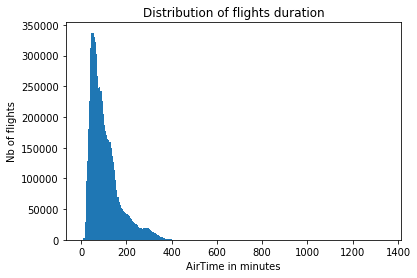

In [17]:
bin = np.arange(0, df_2008['AirTime'].max(), 5)
plt.hist(data = df_2008, 
         x = 'AirTime', 
         bins = bin)

plt.xlabel('AirTime in minutes')
plt.ylabel('Nb of flights')
plt.title('Distribution of flights duration')

plt.show()

In [13]:
df_2008['AirTime'].mean()

104.0185891263188

We can observe a lot of flights around 100 minutes, but it is difficult to discern very well the distribution. 
As learnt during the lessons, I will try to observe this distribution thanks to a logarithmique distribution.

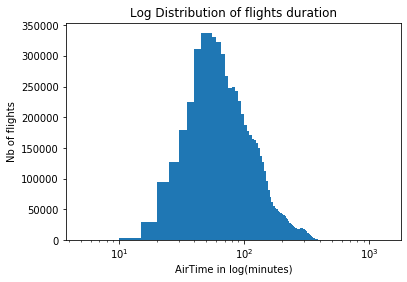

In [18]:
bin = np.arange(0, df_2008['AirTime'].max(), 5)
plt.hist(data = df_2008, 
         x = 'AirTime', 
         bins = bin)

plt.xscale('log')
plt.xlabel('AirTime in log(minutes)')
plt.ylabel('Nb of flights')
plt.title('Log Distribution of flights duration')

plt.show()

In [19]:
df_delay = df_2008.groupby(['Month'])['ArrDelay'].mean().reset_index( name = 'Avg_ArrDelay') 

In [21]:
min_ArrDelay = df_delay['Avg_ArrDelay'].min()
max_ArrDelay = df_delay['Avg_ArrDelay'].max()

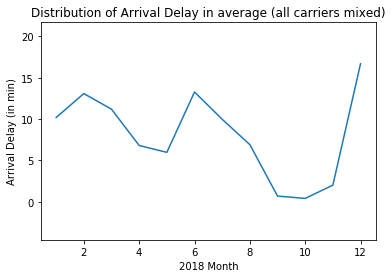

In [22]:
plt.plot(df_delay['Month'], 
             df_delay['Avg_ArrDelay'])

plt.title('Distribution of Arrival Delay in average (all carriers mixed)')
plt.ylabel('Arrival Delay (in min)')
plt.xlabel('2018 Month')
plt.ylim(ymin = min_ArrDelay - 5,
         ymax = max_ArrDelay + 5)
plt.show()

In [23]:
df_delay['Avg_ArrDelay'].mean()

8.100592924240631

The average arrival delay is of 8 minutes but there are some variations during the months. 
I have analyzed the mean at a total level, but there could be some main differences by air carrier which I will focus on.

In [62]:
df_2008.groupby(['UniqueCarrier'])['ArrDelay'].mean()

UniqueCarrier
9E     4.111135
AA    12.607194
AQ    -2.888674
AS     4.804346
B6    11.084184
CO    10.979037
DL     7.855163
EV    10.208002
F9     6.108247
FL     9.091375
HA     1.264409
MQ     9.890668
NW     7.368539
OH    11.817468
OO     6.598885
UA    11.291322
US     2.848110
WN     5.179678
XE    10.635405
YV    11.775181
Name: ArrDelay, dtype: float64

In [24]:
df_carrier_arrdelay = df_2008.groupby(['UniqueCarrier', 'Month'])['ArrDelay'].mean().reset_index( name = 'Avg_ArrDelay')

In [60]:
df_carrier_arrdelay

,UniqueCarrier,Month,Avg_ArrDelay
0,9E,1,12.267573
1,9E,2,15.893290
2,9E,3,9.517853
3,9E,4,3.283838
4,9E,5,-0.129141
5,9E,6,4.135322
6,9E,7,0.489986
7,9E,8,-3.920885
8,9E,9,-4.676045
9,9E,10,-4.046999


In [25]:
max_ArrDelay = df_carrier_arrdelay['Avg_ArrDelay'].max()
min_ArrDelay = df_carrier_arrdelay['Avg_ArrDelay'].min()




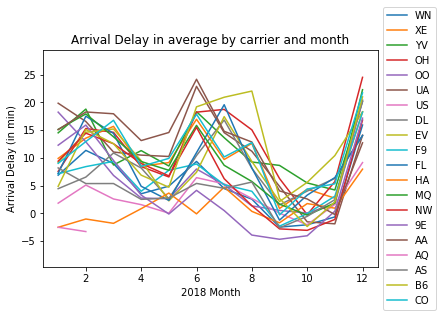

In [27]:
for i in Carrier_list: 
    plt.plot(df_carrier_arrdelay[df_carrier_arrdelay['UniqueCarrier'] == i]['Month'], 
             df_carrier_arrdelay[df_carrier_arrdelay['UniqueCarrier'] == i]['Avg_ArrDelay'],
            label = i)

plt.title('Arrival Delay in average by carrier and month')
plt.ylabel('Arrival Delay (in min)')
plt.xlabel('2018 Month')
plt.ylim(ymin = min_ArrDelay - 5,
         ymax = max_ArrDelay + 5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

There are a seasonnality of the arrival delay, but also a lof of differences between the differents air carriers. 

As it is quite hard to understand the global situation, I will distinguished flights arrival delay : 
either there are on time, either there are late. 

I will consider that a flight is delayed after a delay of 15 minutes. 

In [30]:
df_2008['on_time'] = 0
df_2008['on_time'][df_2008['ArrDelay'] <= 15] = 1 

/Users/victoire/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
df_2008.groupby(['on_time']).size().reset_index(name = 'nb_flights')

,on_time,nb_flights
0,0,1620890
1,1,5388838


In [32]:
df_carrier_ontime = df_2008.groupby(['UniqueCarrier', 'on_time', 'Month']).size().reset_index(name = 'nb_flights')

In [33]:
df_carrier_ontime = 100 * df_carrier_ontime[df_carrier_ontime['on_time'] == 1].groupby(['UniqueCarrier', 'Month'])['nb_flights'].sum()/df_carrier_ontime.groupby(['UniqueCarrier', 'Month'])['nb_flights'].sum()

In [34]:
df_carrier_ontime = df_carrier_ontime.reset_index( name = 'percent_on_time')

In [59]:
df_carrier_ontime

,UniqueCarrier,Month,percent_on_time
0,9E,1,70.036765
1,9E,2,64.656321
2,9E,3,72.170942
3,9E,4,81.109746
4,9E,5,86.462273
5,9E,6,81.312192
6,9E,7,86.158581
7,9E,8,90.049403
8,9E,9,90.932195
9,9E,10,91.168527


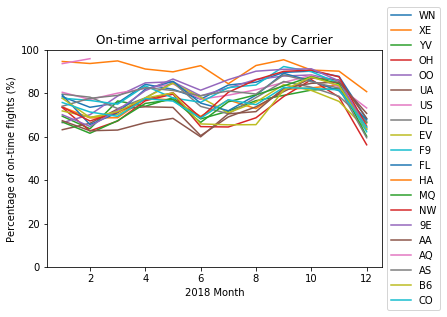

In [35]:
for i in Carrier_list: 
    plt.plot(df_carrier_ontime[df_carrier_ontime['UniqueCarrier'] == i]['Month'], 
             df_carrier_ontime[df_carrier_ontime['UniqueCarrier'] == i]['percent_on_time'],
            label = i)

plt.title('On-time arrival performance by Carrier')
plt.ylabel('Percentage of on-time flights (%)')
plt.xlabel('2018 Month')
plt.ylim(ymin = 0,
         ymax = 100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

All carriers seem to have the same trend by months. There are some differences for some of them, but globaly there is a trend easy to observe.

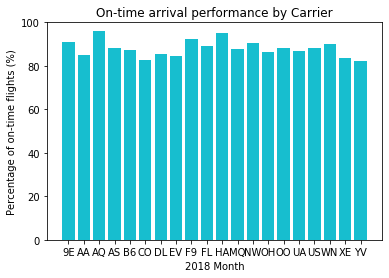

In [37]:
# visualization thanks to a bar chart at a gloabl 2008 level
for i in Carrier_list: 
    plt.bar(df_carrier_ontime['UniqueCarrier'], 
            df_carrier_ontime['percent_on_time'])

plt.title('On-time arrival performance by Carrier')
plt.ylabel('Percentage of on-time flights (%)')
plt.xlabel('2018 Month')
plt.ylim(ymin = 0,
         ymax = 100)
plt.show()

There is perhaps also some variations by origin airport. 

In [38]:
df_ontime_origin = df_2008.groupby(['Origin', 'on_time']).size().reset_index( name = 'nb_flights')

In [39]:
df_ontime_origin = 100 * df_ontime_origin[df_ontime_origin['on_time'] == 1].groupby(['Origin'])['nb_flights'].sum()/df_ontime_origin.groupby(['Origin'])['nb_flights'].sum()

In [40]:
df_ontime_origin = df_ontime_origin.reset_index(name = 'percent_on_time')

In [41]:
df_ontime_origin = df_ontime_origin.sort_values(by = ['percent_on_time'], ascending = False)
df_ontime_origin = df_ontime_origin.head(20)

In [58]:
df_ontime_origin

,Origin,percent_on_time
141,INL,98.611111
298,WYS,98.484848
33,BLI,95.833333
268,SLE,94.855967
222,PIH,93.309222
171,LWS,92.944785
67,COD,91.835017
214,OXR,91.563467
228,PSC,91.460055
261,SGU,91.172040


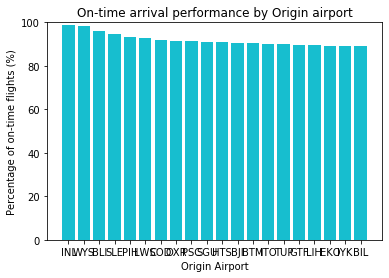

In [42]:
for i in Carrier_list: 
    plt.bar(df_ontime_origin['Origin'], 
            df_ontime_origin['percent_on_time'])

plt.title('On-time arrival performance by Origin airport')
plt.ylabel('Percentage of on-time flights (%)')
plt.xlabel('Origin Airport')
plt.ylim(ymin = 0,
         ymax = 100)
plt.show()

Or a variation by destination airport ? 

In [43]:
df_ontime_dest = df_2008.groupby(['Dest', 'on_time']).size().reset_index( name = 'nb_flights')

In [44]:
df_ontime_dest = 100 * df_ontime_dest[df_ontime_dest['on_time'] == 1].groupby(['Dest'])['nb_flights'].sum()/df_ontime_dest.groupby(['Dest'])['nb_flights'].sum()

In [45]:
df_ontime_dest = df_ontime_dest.reset_index(name = 'percent_on_time')

In [46]:
df_ontime_dest = df_ontime_dest.sort_values(by = ['percent_on_time'], ascending = False)
df_ontime_dest = df_ontime_dest.head(20)

In [57]:
df_ontime_dest

,Dest,percent_on_time
289,TUP,100.000000
32,BJI,94.594595
299,WYS,92.803030
172,LWS,91.564417
33,BLI,90.909091
147,IYK,90.566038
146,ITO,90.224817
143,IPL,89.756592
165,LIH,89.589498
60,CLD,89.265537


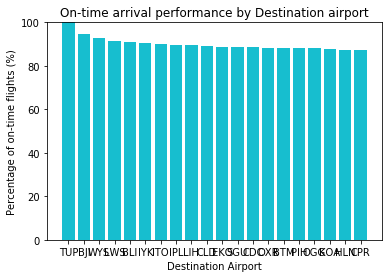

In [47]:
for i in Carrier_list: 
    plt.bar(df_ontime_dest['Dest'], 
            df_ontime_dest['percent_on_time'])

plt.title('On-time arrival performance by Destination airport')
plt.ylabel('Percentage of on-time flights (%)')
plt.xlabel('Destination Airport')
plt.ylim(ymin = 0,
         ymax = 100)
plt.show()

is there a correlation between some variables of the dataset ? 

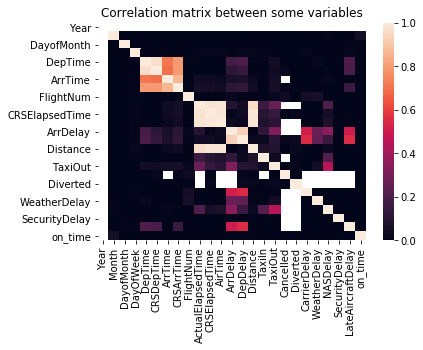

In [50]:
sns.heatmap(df_2008.corr(), 
            vmin=0, 
            vmax=1)

plt.title('Correlation matrix between some variables')
plt.show()

There seems to be a high correlation between arrival and departure delay. 
As I do not see a lof of information on this big matrix, I will focus only on these two variables. 

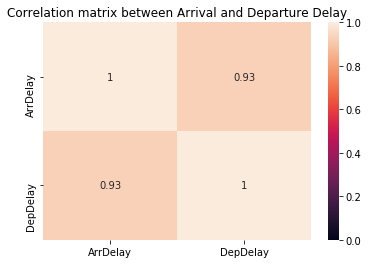

In [52]:
df_cor = df_2008[['ArrDelay', 'DepDelay']]
corr = df_cor.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, 
            vmin=0, 
            vmax=1,
            annot=True)

plt.title('Correlation matrix between Arrival and Departure Delay')
plt.show()

The correlation coefficient between these 2 variables is 0,93. 
When it is higher to 0,75, there is a high correlation between both variables : it is the case here. 

I would like also to focus a little bit on the reason of delay. 
In this dataset, delays can have 5 causes which are all detailed in a separate column.

In [56]:
df_2008[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].sum()

CarrierDelay         24048217.0
WeatherDelay          4633717.0
NASDelay             26171501.0
SecurityDelay          114316.0
LateAircraftDelay    31670242.0
dtype: float64

In [55]:
df_2008.groupby('Month')[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].sum()

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Month,,,,,
1,2355954.0,429828.0,2422180.0,12912.0,3145788.0
2,2398296.0,544326.0,2572644.0,11361.0,3495284.0
3,2527895.0,474687.0,2487133.0,15117.0,3344243.0
4,1926766.0,268806.0,1964005.0,7645.0,2277313.0
5,1722631.0,240013.0,1996671.0,9751.0,2244264.0
6,2482267.0,571832.0,3226918.0,10614.0,3580641.0
7,2417097.0,555794.0,2716037.0,13126.0,3062892.0
8,2130584.0,398906.0,2068748.0,7414.0,2490422.0
9,1218688.0,157032.0,1177489.0,4823.0,1075911.0


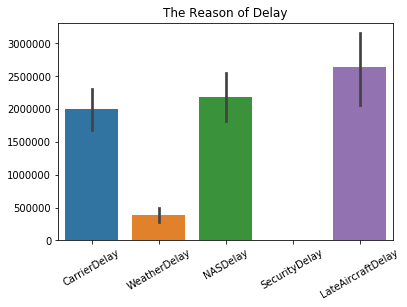

In [54]:
sns.barplot(data= df_2008.groupby('Month')[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].sum())

plt.title('The Reason of Delay')
plt.xticks(rotation='30')

plt.show()

In [47]:
df_2008['Cancelled'].value_counts()

0    6872294
1     137434
Name: Cancelled, dtype: int64

What could be the cancellation flights cause ? 

In [63]:
df_2008['CancellationCode'].groupby(df_2008['Year']).value_counts().groupby(level=[0]).nlargest(3).reset_index(level=0, drop=True).unstack(fill_value=0)

CancellationCode,B,A,C
Year,,,
2008,54904,54330,28188


In [65]:
df_cancel = df_2008['CancellationCode'].groupby(df_2008['Year']).value_counts().groupby(level=[0]).nlargest(3).reset_index(level=0, drop=True).unstack(fill_value=0)
df_cancel_month = df_2008['CancellationCode'].groupby(df_2008['Month']).value_counts().groupby(level=[0]).nlargest(3).reset_index(level=0, drop=True).unstack(fill_value=0)

In the dataset, cancellation reason are indicated by a cancellation code. For being meaningfull, I will replace these letters by the real reasons.  

In [66]:
df_cancel.rename(columns = {"A": "Carrier", 'B' : 'Weather', 'C': 'NAS', 'D': 'Security'}, inplace = True)
df_cancel_month.rename(columns = {"A": "Carrier", 'B' : 'Weather', 'C': 'NAS', 'D': 'Security'}, inplace = True)

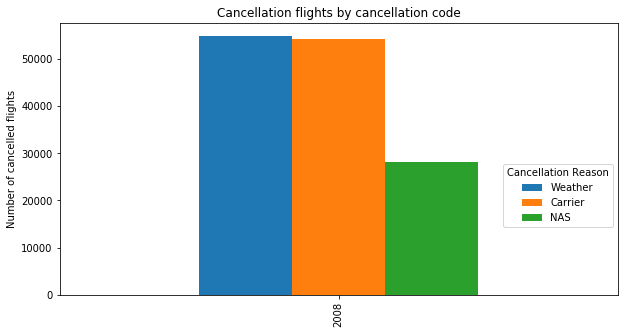

In [67]:
df_cancel.plot(kind = 'bar', 
                sort_columns= 'CancellationCode',  
                figsize=(10,5));
plt.legend(bbox_to_anchor=(1, 0.5), 
           title = 'Cancellation Reason')
plt.xlabel('')
plt.ylabel('Number of cancelled flights')
plt.title('Cancellation flights by cancellation code');

plt.show()

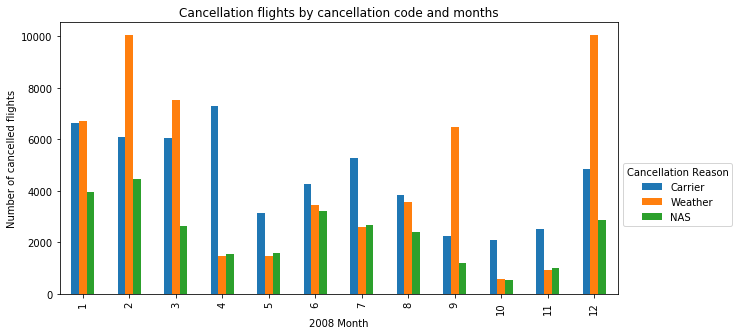

In [69]:
df_cancel_month.plot(kind = 'bar', 
                sort_columns= 'CancellationCode',  
                figsize=(10,5));
plt.legend(bbox_to_anchor=(1, 0.5), 
           title = 'Cancellation Reason')
plt.xlabel('2008 Month')
plt.ylabel('Number of cancelled flights')
plt.title('Cancellation flights by cancellation code and months');

plt.show()